## Hidden Markov Models 
Learn how to use `hmmlearn` and use it to:
1. generate data 
2. fit models to the data
3. run classification on the fake data

Then move to DTW; then to real world data.  

In [1]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#### Test

In [2]:
np.random.seed(42)
model = hmm.GaussianHMM(n_components = 2, covariance_type = "diag")

# Vector pi; shape: (n_components,)
model.startprob_ = np.array([0.9, 0.1]) 

# Matrix A; shape: (n_components, n_components)
model.transmat_ = np.array([[0.9, 0.1],
                            [0.1, 0.9]])

# Emission distribution means (Gaussian); shape: (n_components, n_features)
model.means_ = np.array([[0], [3]])

# Emission distribution covariation matrix? (Gaussian); shape: (n_components, n_features)
# Shape depends on type of covariance matrix and for some there's a need to manually set n_features (bug)
model.covars_ = np.array([[0.1], [0.5]])
X, Z = model.sample(50)

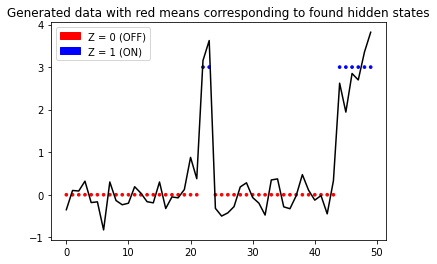

In [3]:
# Data
means = [model.means_[i] for i in Z]
colors = ["red" if z==0 else "blue" for z in Z]
# Legend
red_patch = mpatches.Patch(color = 'red', label = 'Z = 0 (OFF)')
blue_patch = mpatches.Patch(color = 'blue', label = 'Z = 1 (ON)')

plt.plot(X, color = "black")
plt.scatter(np.array(range(len(Z))), means, color = colors, s = 7)
plt.title("Generated data with red means corresponding to found hidden states")
plt.legend(handles=[red_patch, blue_patch])

#### Different models for classification
- 3 devices with on/off switch (2 states). Almost no variance when device is off. Two models are similar.
- 1 device with 5 states
- 2 devices with 3 states
- 3 devices with one state

##### Create 9 models

In [4]:
models_lst = []

In [5]:
model_switch_1 = hmm.GaussianHMM(n_components= 2, covariance_type= "diag")
model_switch_1.means_ = np.array([[0.5],[100]])
model_switch_1.covars_ = np.array([[0.001],[10]])
model_switch_1.startprob_ = np.array([0.8, 0.2])
model_switch_1.transmat_ = np.array([[0.9, 0.1],
                                    [0.5, 0.5]])
models_lst.append(model_switch_1)

In [6]:
model_switch_2 = hmm.GaussianHMM(n_components= 2, covariance_type= "diag")
model_switch_2.means_ = np.array([[0.5],[98]])
model_switch_2.covars_ = np.array([[0.001],[4]])
model_switch_2.startprob_ = np.array([0.7, 0.3]) # pytanie: Czy start prob nie powinno być punktem stacj. czy cośtam macierzy A?
model_switch_2.transmat_ = np.array([[0.8, 0.2],
                                    [0.6, 0.4]])
models_lst.append(model_switch_2)

In [7]:
model_switch_3 = hmm.GaussianHMM(n_components= 2, covariance_type= "diag")
model_switch_3.means_ = np.array([[0.5],[50]])
model_switch_3.covars_ = np.array([[0.001],[5]])
model_switch_3.startprob_ = np.array([0.3, 0.7])
model_switch_3.transmat_ = np.array([[0.6, 0.4],
                                    [0.2, 0.8]
                                    ])
                                    
models_lst.append(model_switch_3)

In [8]:
model_1hidden_1 = hmm.GaussianHMM(n_components= 1, covariance_type= "diag")
model_1hidden_1.means_ = np.array([[100]])
model_1hidden_1.covars_ = np.array([[30]])
model_1hidden_1.startprob_ = np.array([1])
model_1hidden_1.transmat_ = np.array([[1]])
models_lst.append(model_1hidden_1)

In [9]:
model_1hidden_2 = hmm.GaussianHMM(n_components= 1, covariance_type= "diag")
model_1hidden_2.means_ = np.array([[50]])
model_1hidden_2.covars_ = np.array([[1]])
model_1hidden_2.startprob_ = np.array([1])
model_1hidden_2.transmat_ = np.array([[1]])
models_lst.append(model_1hidden_2)

In [10]:
model_1hidden_3 = hmm.GaussianHMM(n_components= 1, covariance_type= "diag")
model_1hidden_3.means_ = np.array([[100]])
model_1hidden_3.covars_ = np.array([[1]])
model_1hidden_3.startprob_ = np.array([1])
model_1hidden_3.transmat_ = np.array([[1]])
models_lst.append(model_1hidden_3)

In [11]:
model_5hidden_3 = hmm.GaussianHMM(n_components= 5, covariance_type= "diag")
model_5hidden_3.means_ = np.array([[0.1],[20],[30],[200],[300]])
model_5hidden_3.covars_ = np.array([[0.001],[0.2],[0.3],[0.5],[0.5]])
model_5hidden_3.startprob_ = np.array([0.6, 0.1, 0.1, 0.1, 0.1])
model_5hidden_3.transmat_ = np.array([[0.6, 0.0, 0.1, 0.1, 0.2],
                                      [0.1, 0.8, 0.05, 0.04, 0.01],
                                      [0.1, 0.05, 0.8, 0.04, 0.01],    
                                      [0.05, 0.2, 0.02, 0.7, 0.03], 
                                      [0.3, 0.03, 0.03, 0.04, 0.6]
                                      ])
models_lst.append(model_5hidden_3)

In [12]:
model_3hidden_1 = hmm.GaussianHMM(n_components= 3, covariance_type= "diag")
model_3hidden_1.means_ = np.array([[0.1],[50], [100]])
model_3hidden_1.covars_ = np.array([[0.001],[5], [5]])
model_3hidden_1.startprob_ = np.array([0.1, 0.7, 0.2])
model_3hidden_1.transmat_ = np.array([[0.6, 0.4, 0.0],
                                      [0.1, 0.8, 0.1],
                                      [0.7, 0.01, 0.29]
                                      ])
models_lst.append(model_3hidden_1)

In [13]:
model_3hidden_2 = hmm.GaussianHMM(n_components= 3, covariance_type= "diag")
model_3hidden_2.means_ = np.array([[1],[30], [45]])
model_3hidden_2.covars_ = np.array([[0.001],[5], [5]])
model_3hidden_2.startprob_ = np.array([0.1, 0.7, 0.2])
model_3hidden_2.transmat_ = np.array([[0.5, 0.4, 0.1],
                                      [0.1, 0.6, 0.3],
                                      [0.2, 0.51, 0.29]
                                      ])
models_lst.append(model_3hidden_2)

##### Plots of samples n = 100

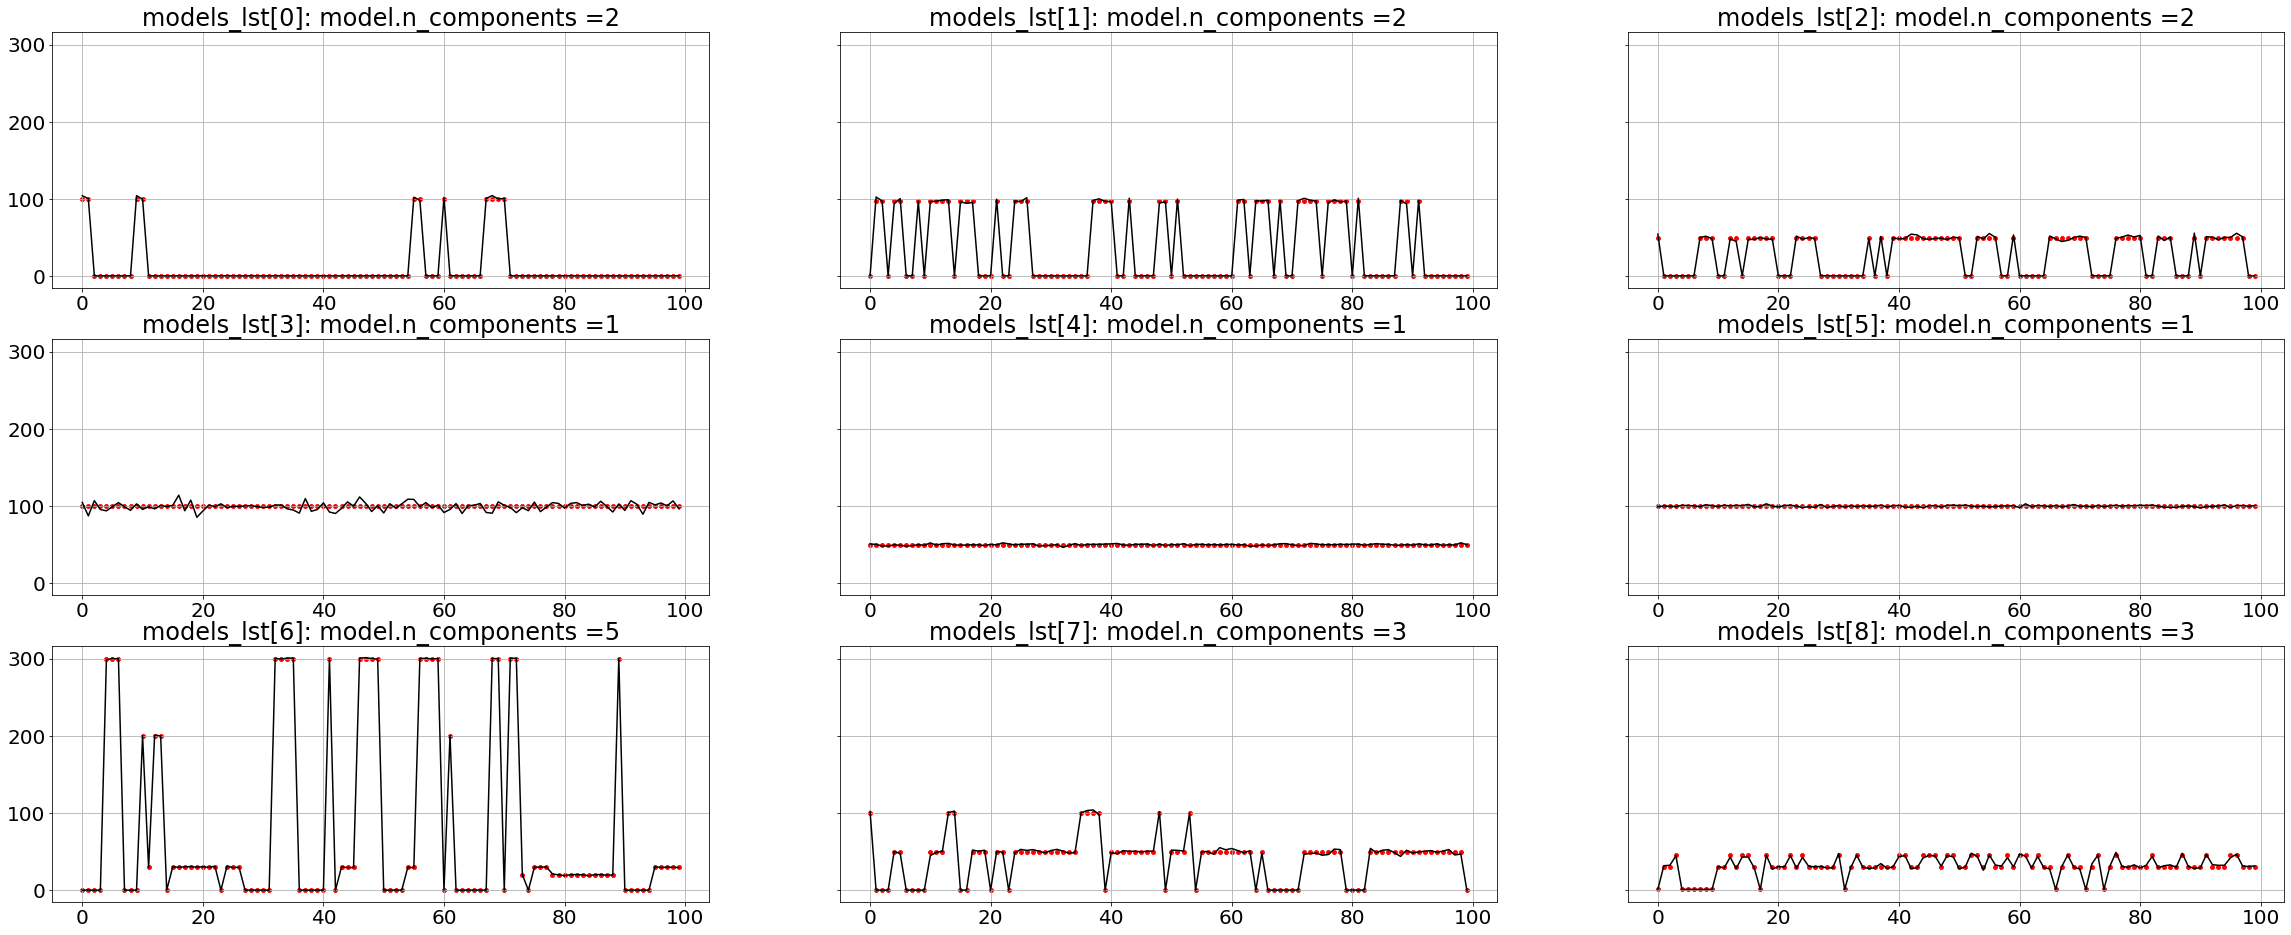

In [14]:
plt.rcParams["figure.figsize"] = (40, 16)
plt.rcParams['font.size'] = 20
fig, axes = plt.subplots(3,3, sharey="all")
for i, ax in enumerate(axes.reshape(-1)):
    model = models_lst[i]
    try:
        X,Z = model.sample(100)
    except Exception as e:
        print(f"Error in model {i}: {e}")
        continue
        
    means = [model.means_[hidden_state] for hidden_state in Z]
    ax.plot(X, color = "black")
    ax.scatter(np.array(range(len(Z))), means, color = "red", s = 15)
    ax.set_title(f"models_lst[{i}]: {model.n_components =}")
    ax.grid()

##### Fit models v1
- each model generates 10 samples of 100 data points
- goal: guess which model generated the sample

Generate all samples
- TODO: Dowiedziec sie jak dziala fittowanie multiple sequences
- TODO 2: Zamknac to wszystko w funkcje i testowac jak dziala dla malych / duzych prob itp

In [94]:
sample_lengths = [100]*10
train_fraction = 0.9

samples_XZ = [model.sample(sum(sample_lengths)) for model in models_lst]
samples_X = np.array([sample[0].reshape(-1) for sample in samples_XZ])
samples_df = pd.DataFrame(samples_X).transpose()
train_df = samples_df.iloc[ :int(np.floor(train_fraction*len(samples_df)))]
test_df = samples_df.iloc[int(np.floor(train_fraction*len(samples_df))): ]

Fit the models

In [117]:
def fit_with_known_no_hidden_states(X, lengths, no_hidden_states, trials, print_scores = False) -> hmm.GaussianHMM:
    """Fit GaussianHMM with known number of hidden states."""
    best_model = None
    best_score = -np.infty
    for t in range(trials):
        remodel = hmm.GaussianHMM(n_components = no_hidden_states).fit(X)
        if not remodel.monitor_.converged:
            print(f"Model in trial {t} didn't converge.") 
        score = remodel.score(X) # log-likelihood of the model
        if score > best_score:
            best_model = remodel
            best_score = score
            if print_scores: 
                print(f"Model in trial {t} is best so far with score {score}.")
    return best_model

def AIC(X, lengths, model) -> float:
    loglik = model.score(X, lengths)
    k = model.n_components
    return 2*k - 2*loglik

def BIC(X, lengths, model) -> float:
    loglik = model.score(X, lengths)
    k = model.n_components
    n = sum(lengths) # TODO jak to dziala jak to rozbijam na czesci?
    return k*np.log(n) - 2*loglik

def compute_AIC_BIC(X, lengths, search_space: list[int], trials):
    models = [fit_with_known_no_hidden_states(X, lengths, nhs, trials) for nhs in search_space]
    AICs = [AIC(X, lengths, model) for model in models]
    BICs = [BIC(X, lengths, model) for model in models]
    # print(f"Models:\n{models}\nAICs:\n{AICs}\nBICs:\n{BICs}")
    return {"models": models, "AIC": AICs, "BIC": BICs}

def fit_best_model(X, lengths, trials = 10, criterion = "AIC", print_debug = False):
    results = compute_AIC_BIC(X, lengths, [1,2,3,4,5,6], trials)
    best_model_id = np.argmin(results[criterion])
    if print_debug: 
        print("Fitting best model - results:")
        print(results)
    return results["models"][best_model_id]

fitted_models_lst = []
for i in range(train_df.shape[1]):
    X = np.array([train_df.iloc[:,i]]).transpose()
    fitted_models_lst.append(fit_best_model(X, sample_lengths[:-1]))


Use fitted models to classification